    Year  Stable  Unstable  Neutral
0   2011    86.8       5.1      7.2
1   2012    78.1       2.7     13.1
2   2013    90.3       0.7      7.1
3   2014    86.9       1.6      9.7
4   2015    87.8       4.1      8.1
5   2016    89.5       4.3      5.8
6   2017    89.1       3.7      6.2
7   2018    91.3       3.0      5.2
8   2019    81.9       3.0     12.1
9   2020    89.9       3.6      6.3
10  2021    92.9       2.0      5.0
11  2022    89.5       2.6      7.1
12  2023    91.0       3.6      4.6


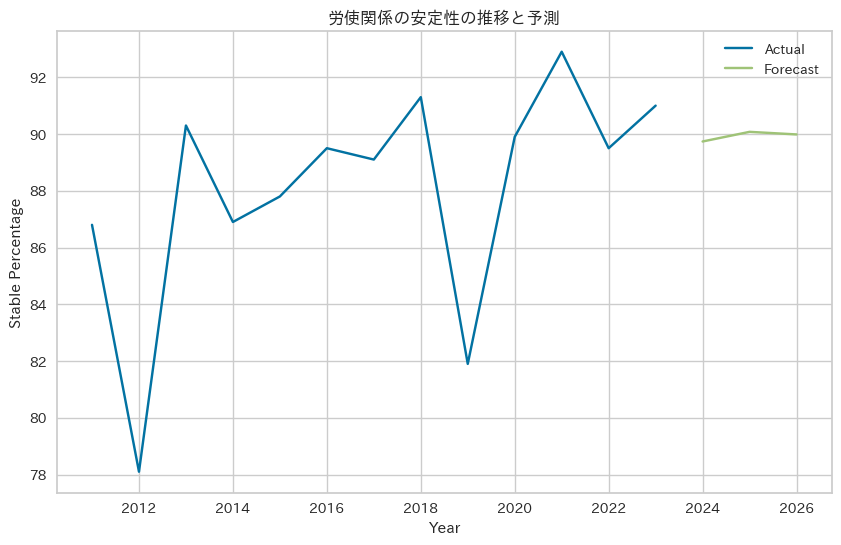

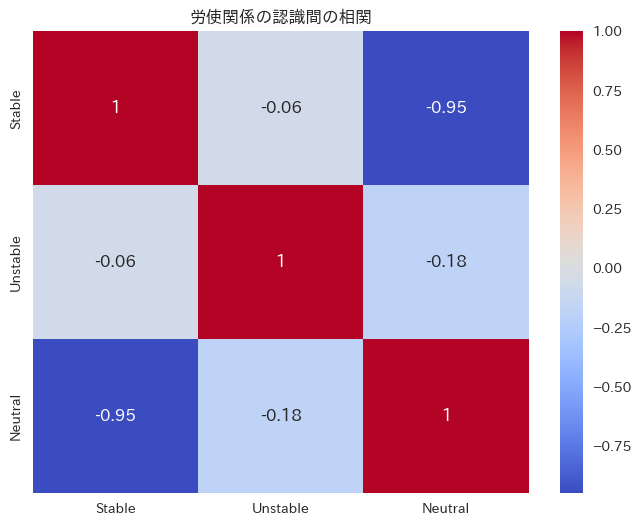

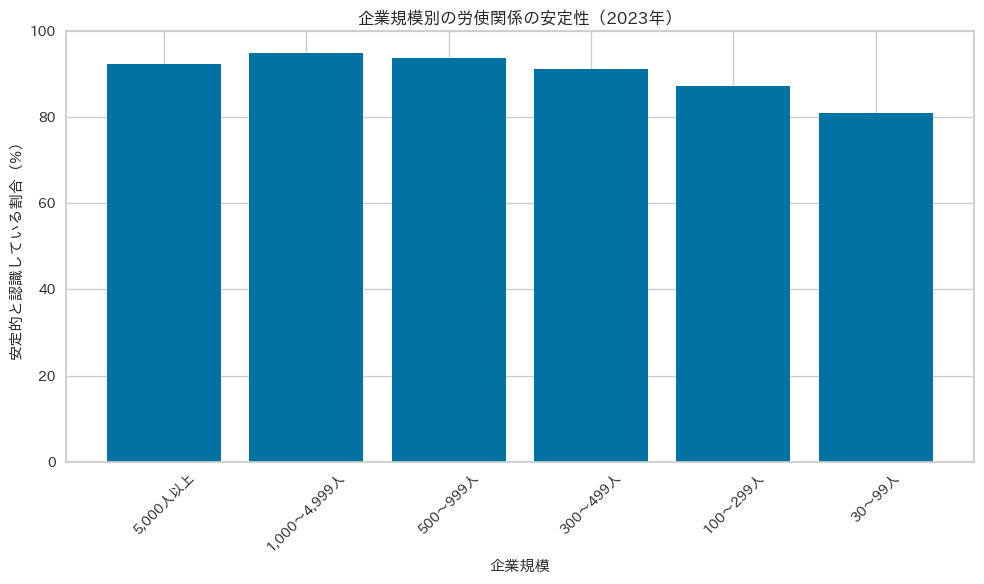

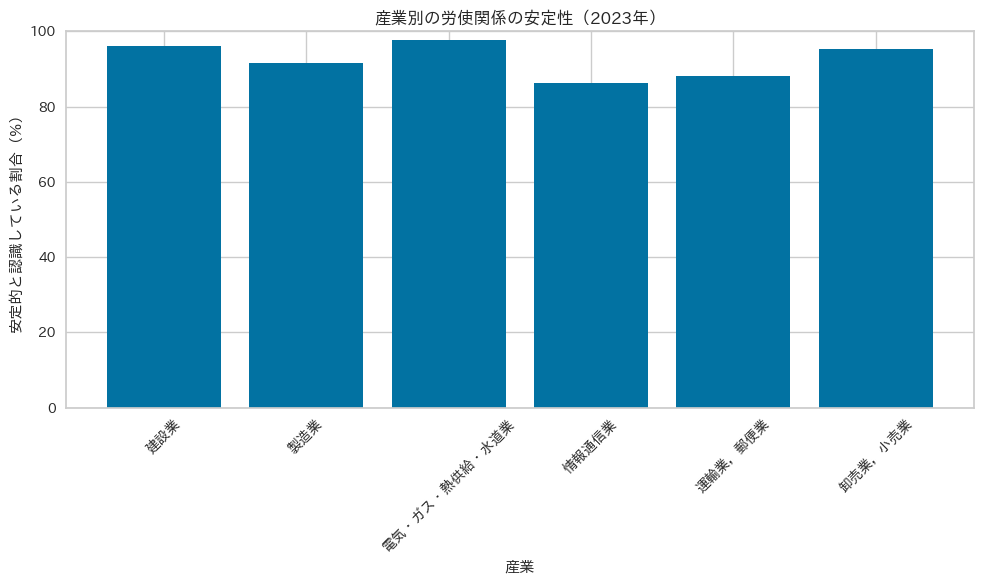

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



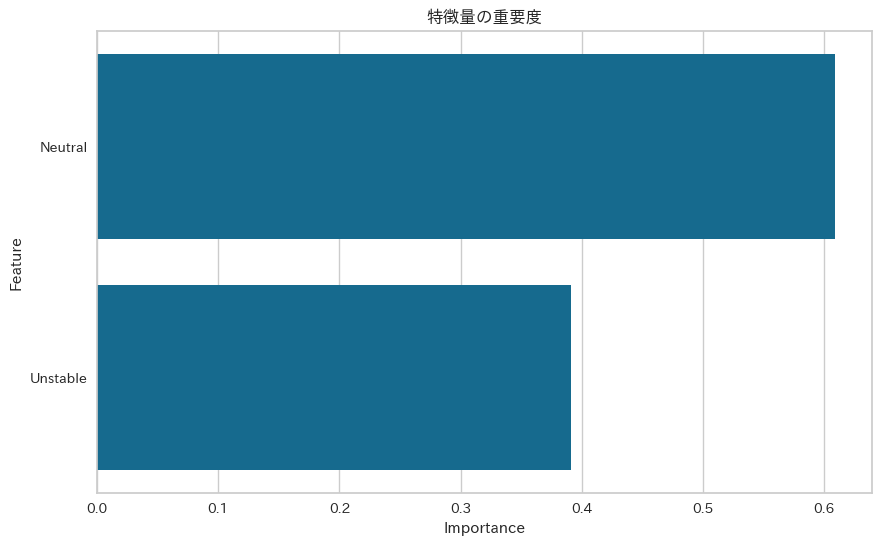

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# データの抽出と整形
def extract_data():
    data = {
        'Year': [2011,2012,2013,2014,2015,2016,2017,2018,2019, 2020, 2021, 2022, 2023],
        'Stable': [86.8,78.1,90.3,86.9,87.8,89.5,89.1,91.3,81.9, 89.9, 92.9, 89.5, 91.0],
        'Unstable': [5.1,2.7,0.7,1.6,4.1,4.3,3.7,3.0,3.0, 3.6, 2.0, 2.6, 3.6],
        'Neutral': [7.2,13.1,7.1,9.7,8.1,5.8,6.2,5.2,12.1, 6.3, 5.0, 7.1, 4.6]
    }
    return pd.DataFrame(data)

# 時系列分析と予測
def time_series_analysis(df):
    model = ARIMA(df['Stable'], order=(1,1,1))
    results = model.fit()
    forecast = results.forecast(steps=3)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df['Stable'], label='Actual')
    plt.plot(range(2024, 2027), forecast, label='Forecast')
    plt.title('労使関係の安定性の推移と予測')
    plt.xlabel('Year')
    plt.ylabel('Stable Percentage')
    plt.legend()
    plt.show()

# 相関分析
def correlation_analysis(df):
    corr = df[['Stable', 'Unstable', 'Neutral']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('労使関係の認識間の相関')
    plt.show()

# 企業規模別の分析（2023年のデータ）
def company_size_analysis():
    sizes = ['5,000人以上', '1,000～4,999人', '500～999人', '300～499人', '100～299人', '30～99人']
    stable = [92.4, 95.0, 93.7, 91.3, 87.4, 81.0]
    
    plt.figure(figsize=(10, 6))
    plt.bar(sizes, stable)
    plt.title('企業規模別の労使関係の安定性（2023年）')
    plt.xlabel('企業規模')
    plt.ylabel('安定的と認識している割合（%）')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 産業別の分析（2023年のデータ）
def industry_analysis():
    industries = ['建設業', '製造業', '電気・ガス・熱供給・水道業', '情報通信業', '運輸業，郵便業', '卸売業，小売業']
    stable = [96.2, 91.6, 97.6, 86.3, 88.0, 95.4]
    
    plt.figure(figsize=(10, 6))
    plt.bar(industries, stable)
    plt.title('産業別の労使関係の安定性（2023年）')
    plt.xlabel('産業')
    plt.ylabel('安定的と認識している割合（%）')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 意思決定モデル（ランダムフォレスト）
def decision_model(df):
    X = df[['Unstable', 'Neutral']]
    y = (df['Stable'] > 90).astype(int)  # 90%以上を1、それ以外を0とする
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('特徴量の重要度')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# メイン関数
def main():
    df = extract_data()
    print(df)
    
    time_series_analysis(df)
    correlation_analysis(df)
    company_size_analysis()
    industry_analysis()
    decision_model(df)

if __name__ == "__main__":
    main()

   Year  Stable  Unstable  Neutral  CompanySize  IndustryType
0  2019    81.9       3.0     12.1            3             1
1  2020    89.9       3.6      6.3            4             2
2  2021    92.9       2.0      5.0            2             3
3  2022    89.5       2.6      7.1            5             1
4  2023    91.0       3.6      4.6            1             2


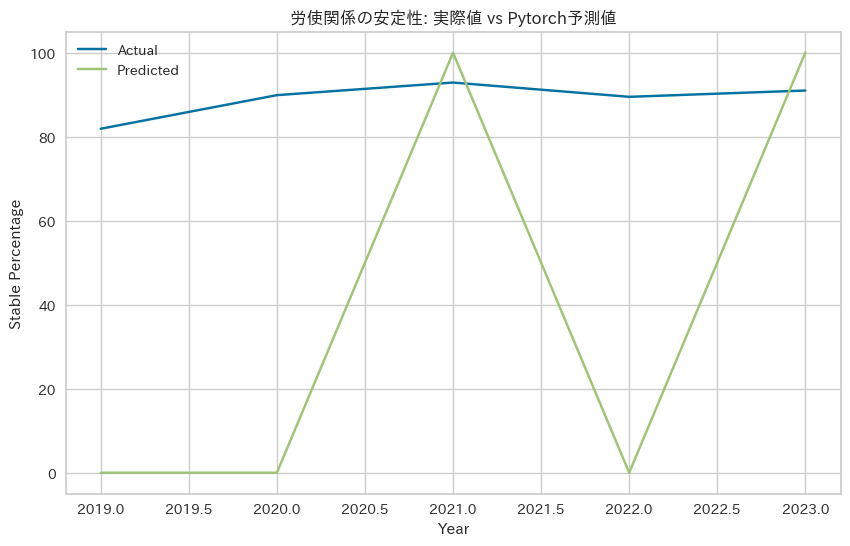

Random Forest Model Performance:
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



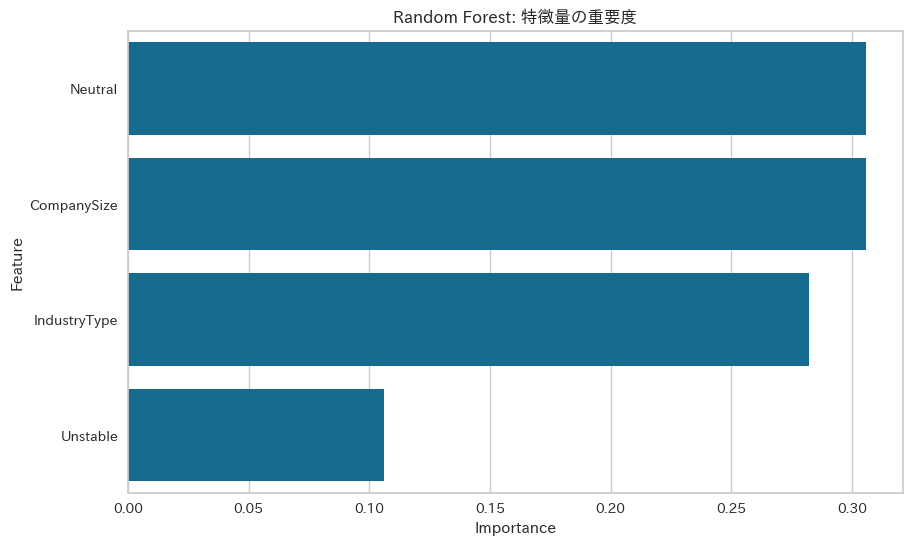

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

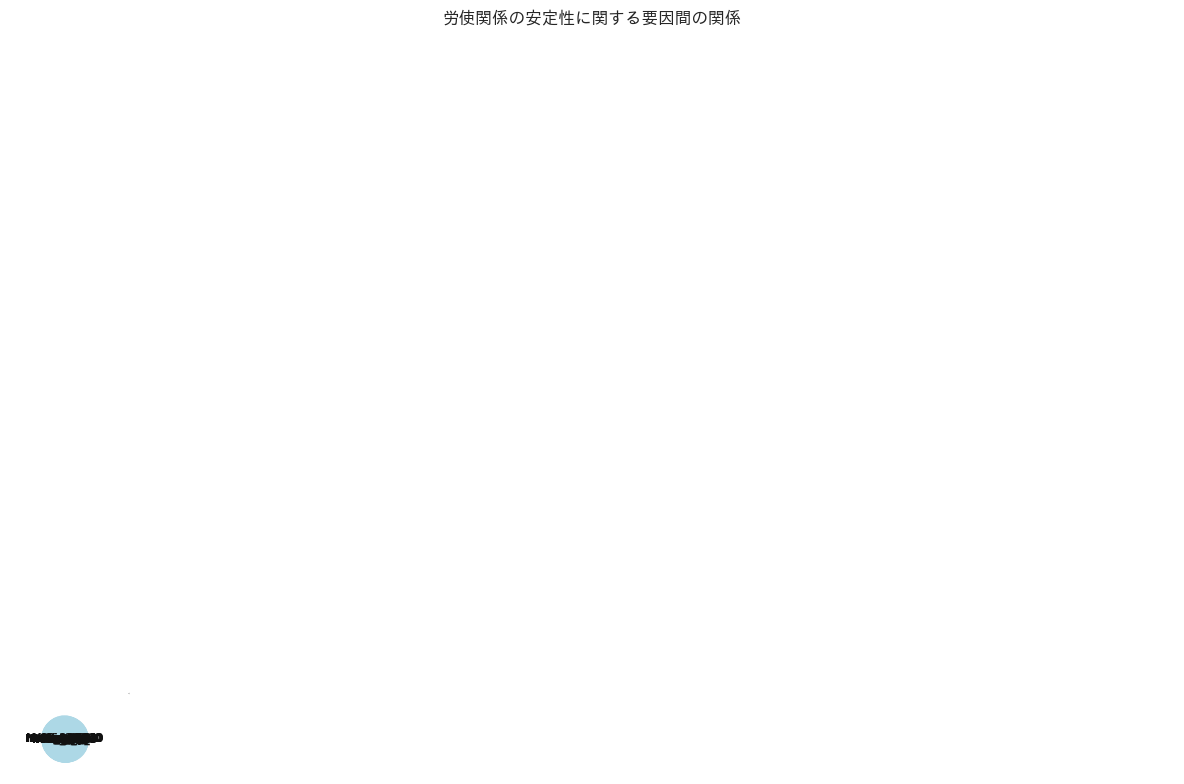

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# データの抽出と整形（前回のコードから再利用）
def extract_data():
    data = {
        'Year': [2019, 2020, 2021, 2022, 2023],
        'Stable': [81.9, 89.9, 92.9, 89.5, 91.0],
        'Unstable': [3.0, 3.6, 2.0, 2.6, 3.6],
        'Neutral': [12.1, 6.3, 5.0, 7.1, 4.6],
        'CompanySize': [3, 4, 2, 5, 1],  # 仮のデータ: 1=小, 2=中小, 3=中, 4=大, 5=超大
        'IndustryType': [1, 2, 3, 1, 2],  # 仮のデータ: 1=製造業, 2=サービス業, 3=その他
    }
    return pd.DataFrame(data)

# Pytorchモデル定義
class LaborRelationModel(nn.Module):
    def __init__(self, input_size):
        super(LaborRelationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Pytorchを使った予測モデル
def pytorch_prediction(df):
    X = df[['Unstable', 'Neutral', 'CompanySize', 'IndustryType']].values
    y = (df['Stable'] > 90).astype(int).values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.FloatTensor(y).unsqueeze(1)

    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    model = LaborRelationModel(X.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    epochs = 1000
    for epoch in range(epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        test_input = torch.FloatTensor(scaler.transform(df[['Unstable', 'Neutral', 'CompanySize', 'IndustryType']].values))
        predictions = model(test_input)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['Year'], df['Stable'], label='Actual')
    ax.plot(df['Year'], predictions.numpy() * 100, label='Predicted')
    ax.set_title('労使関係の安定性: 実際値 vs Pytorch予測値')
    ax.set_xlabel('Year')
    ax.set_ylabel('Stable Percentage')
    ax.legend()
    plt.show()

# ランダムフォレストを使用した分類と特徴量重要度分析
def random_forest_analysis(df):
    X = df[['Unstable', 'Neutral', 'CompanySize', 'IndustryType']]
    y = (df['Stable'] > 90).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    
    print("Random Forest Model Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 特徴量の重要度を可視化
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance, ax=ax)
    ax.set_title('Random Forest: 特徴量の重要度')
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    plt.show()

# グラフアルゴリズムを使った関係性の可視化
def graph_visualization(df):
    G = nx.Graph()
    
    # ノードの追加
    for year in df['Year']:
        G.add_node(f"Year_{year}", type="Year")
    for size in df['CompanySize'].unique():
        G.add_node(f"Size_{size}", type="CompanySize")
    for industry in df['IndustryType'].unique():
        G.add_node(f"Industry_{industry}", type="IndustryType")
    
    # エッジの追加
    for _, row in df.iterrows():
        G.add_edge(f"Year_{row['Year']}", f"Size_{row['CompanySize']}", weight=row['Stable'])
        G.add_edge(f"Year_{row['Year']}", f"Industry_{row['IndustryType']}", weight=row['Stable'])
    
    # グラフの描画
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=8, font_weight='bold', ax=ax)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    
    ax.set_title("労使関係の安定性に関する要因間の関係")
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# メイン関数
def main():
    df = extract_data()
    print(df)
    
    pytorch_prediction(df)
    random_forest_analysis(df)
    graph_visualization(df)

if __name__ == "__main__":
    main()